In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [156]:
##Importing Relevant Data

imdb_title_basics_df = pd.read_csv("Data/imdb.title.basics.csv.gz")
imdb_title_ratings_df = pd.read_csv("Data/imdb.title.ratings.csv.gz")

movie_gross_df = pd.read_csv("Data/bom.movie_gross.csv.gz")

In [157]:
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [158]:
imdb_title_basics_df.set_index('tconst', inplace=True)
imdb_title_basics_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [159]:
imdb_title_ratings_df.set_index('tconst', inplace=True)
imdb_title_ratings_df.head(3)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


In [160]:
movie_gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [161]:
##Joining IMDB Data Frames
imdb_joined_df = imdb_title_ratings_df.merge(imdb_title_basics_df, on='tconst', how='inner')
imdb_joined_df.head()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [162]:
##Check to make sure this looks right (Using "Borderless" movie as an example)

imdb_title_basics_df.loc['tt10384606']

primary_title       Borderless
original_title      Borderless
start_year                2019
runtime_minutes             87
genres             Documentary
Name: tt10384606, dtype: object

In [163]:
##All Good!

imdb_title_ratings_df.loc['tt10384606']

averagerating      8.9
numvotes         559.0
Name: tt10384606, dtype: float64

In [164]:
##How many titles were lost?

print("Joined table: ", len(imdb_joined_df))
print("Ratings table: ", len(imdb_title_ratings_df))
print("Basics table: ", len(imdb_title_basics_df))

Joined table:  73856
Ratings table:  73856
Basics table:  146144


In [165]:
## Are primary_title and original_title the same?

imdb_joined_df['primary_title'].equals(imdb_joined_df['original_title'])

False

In [166]:
## Which are different?
imdb_joined_df['Name Match?'] = imdb_joined_df.apply(lambda x:
                                                     True if x['primary_title'] == x['original_title'] else False, axis=1)

In [167]:
imdb_joined_df.head()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Name Match?
tconst,,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,True
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary,True
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama,True
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",True
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",True


In [168]:
imdb_joined_df.loc[imdb_joined_df['Name Match?'] == False]

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Name Match?
tconst,,,,,,,,
tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",False
tt1130982,6.4,571,The Night Clerk,Avant l'aube,2011,104.0,"Drama,Thriller",False
tt1156528,7.2,265,Silent Sonata,Circus Fantasticus,2011,77.0,"Drama,War",False
tt1161457,4.2,148,Vanquisher,The Vanquisher,2016,90.0,"Action,Adventure,Sci-Fi",False
tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",False
...,...,...,...,...,...,...,...,...
tt9461680,5.2,20,"Nona: If They Soak Me, I'll Burn Them","Nona. Si me mojan, yo los quemo",2019,86.0,Fantasy,False
tt9526152,7.6,29,DanMachi: Is It Wrong to Try to Pick Up Girls ...,Gekijouban danjon ni deai o motomeru no wa mac...,2019,82.0,"Action,Adventure,Animation",False
tt9690762,5.6,37,On the Balcony,Yang tai shang,2019,100.0,Drama,False


In [169]:
len(imdb_joined_df)

73856

In [170]:
##Now let's go back to our revenue table
movie_gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [171]:
##Can we join these tables on name?
movie_gross_df.loc[movie_gross_df['title'] == 'Jack and the Cuckoo-Clock Heart']

,title,studio,domestic_gross,foreign_gross,year
1685,Jack and the Cuckoo-Clock Heart,Shout!,NaN,3400000,2014


In [172]:
##We should be joining on primary title

joined_df = movie_gross_df.merge(imdb_joined_df, left_on = 'title', right_on='primary_title', how='inner')

joined_df.head(3)

,title,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,Name Match?
0,Toy Story 3,BV,415000000.0,652000000,2010,8.3,682218,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",True
1,Inception,WB,292600000.0,535700000,2010,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",True
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,6.3,167532,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",True


In [173]:
## Let's do some checking

print("Joined table: ", len(joined_df))
print("IMDB table: ", len(imdb_joined_df))
print("Revenue table: ", len(movie_gross_df))

Joined table:  3027
IMDB table:  73856
Revenue table:  3387


In [174]:
joined_df.drop(columns='primary_title', inplace=True)
joined_df.set_index('title', inplace=True)
#joined_df.head(3)

In [175]:
## Let's check some basic correlations

joined_df.corr()

,domestic_gross,year,averagerating,numvotes,start_year,runtime_minutes,Name Match?
domestic_gross,1.000000,0.008786,0.119300,0.664384,0.037069,0.126917,0.172891
year,0.008786,1.000000,0.040499,-0.121836,0.808273,0.033626,-0.074166
averagerating,0.119300,0.040499,1.000000,0.278394,-0.004172,0.151125,-0.092221
numvotes,0.664384,-0.121836,0.278394,1.000000,-0.078001,0.260232,0.190484
start_year,0.037069,0.808273,-0.004172,-0.078001,1.000000,0.080132,-0.016238
runtime_minutes,0.126917,0.033626,0.151125,0.260232,0.080132,1.000000,-0.034410
Name Match?,0.172891,-0.074166,-0.092221,0.190484,-0.016238,-0.034410,1.000000


In [176]:
## Whoops! First we need foreign gross in an integer
joined_df['foreign_gross'].isnull().sum()

joined_df['foreign_gross'] = pd.to_numeric(joined_df['foreign_gross'], errors='coerce')

In [177]:
joined_df['foreign_gross'].isnull().sum()

1199

In [178]:
joined_df.corr()

,domestic_gross,foreign_gross,year,averagerating,numvotes,start_year,runtime_minutes,Name Match?
domestic_gross,1.000000,0.827830,0.008786,0.119300,0.664384,0.037069,0.126917,0.172891
foreign_gross,0.827830,1.000000,0.129775,0.153432,0.559610,0.121749,0.195664,0.070176
year,0.008786,0.129775,1.000000,0.040499,-0.121836,0.808273,0.033626,-0.074166
averagerating,0.119300,0.153432,0.040499,1.000000,0.278394,-0.004172,0.151125,-0.092221
numvotes,0.664384,0.559610,-0.121836,0.278394,1.000000,-0.078001,0.260232,0.190484
start_year,0.037069,0.121749,0.808273,-0.004172,-0.078001,1.000000,0.080132,-0.016238
runtime_minutes,0.126917,0.195664,0.033626,0.151125,0.260232,0.080132,1.000000,-0.034410
Name Match?,0.172891,0.070176,-0.074166,-0.092221,0.190484,-0.016238,-0.034410,1.000000


In [179]:
joined_df['genres'].isnull().sum()

7

In [180]:
joined_df.dropna(subset=['genres'], inplace=True)

In [181]:
joined_df['genres'].isnull().sum()

0

In [182]:
joined_df.head()

,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,Name Match?
title,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",True
Inception,WB,292600000.0,535700000.0,2010,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",True
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",True
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,5.0,211733,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",True
Iron Man 2,Par.,312400000.0,311500000.0,2010,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",True


In [183]:
## Let's split Genres into different columns

genres_df = joined_df['genres'].str.split(',', expand=True)
genres_df.head()

,0,1,2
title,,,
Toy Story 3,Adventure,Animation,Comedy
Inception,Action,Adventure,Sci-Fi
Shrek Forever After,Adventure,Animation,Comedy
The Twilight Saga: Eclipse,Adventure,Drama,Fantasy
Iron Man 2,Action,Adventure,Sci-Fi


In [184]:
joined_df['Genre 1'] = genres_df[0]
joined_df['Genre 2'] = genres_df[1]
joined_df['Genre 3'] = genres_df[2]

joined_df.head(3)

,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,Name Match?,Genre 1,Genre 2,Genre 3
title,,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",True,Adventure,Animation,Comedy
Inception,WB,292600000.0,535700000.0,2010,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",True,Action,Adventure,Sci-Fi
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",True,Adventure,Animation,Comedy


In [185]:
joined_df.drop(columns=['Name Match?'], inplace=True)
joined_df.head(3)

,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,Genre 1,Genre 2,Genre 3
title,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy
Inception,WB,292600000.0,535700000.0,2010,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",Adventure,Animation,Comedy


In [186]:
genre_list = list(joined_df['Genre 1'].unique())
print(genre_list)

['Adventure', 'Action', 'Animation', 'Biography', 'Drama', 'Comedy', 'Mystery', 'Thriller', 'Horror', 'Documentary', 'Crime', 'Family', 'Romance', 'Fantasy', 'Sport', 'Music', 'Sci-Fi']


In [187]:
combinations_list = joined_df['genres'].unique()
print(combinations_list)

['Adventure,Animation,Comedy' 'Action,Adventure,Sci-Fi'
 'Adventure,Drama,Fantasy' 'Animation,Comedy,Family'
 'Action,Adventure,Animation' 'Adventure,Family,Fantasy'
 'Biography,Drama,History' 'Action,Drama,Family'
 'Action,Adventure,Fantasy' 'Drama,Thriller' 'Action,Animation,Comedy'
 'Action,Drama' 'Action,Adventure,Thriller' 'Action,Adventure,Drama'
 'Action,Adventure,Family' 'Comedy,Romance' 'Action,Adventure,Horror'
 'Mystery,Thriller' 'Action,Mystery,Thriller' 'Comedy,Drama,Romance'
 'Comedy' 'Adventure,Drama,Western' 'Adventure,Comedy,Family'
 'Biography,Drama' 'Adventure,Comedy' 'Drama,Romance' 'Drama' 'Thriller'
 'Horror' 'Action,Comedy,Crime' 'Action,Thriller' 'Action,Crime'
 'Documentary' 'Crime,Drama,Thriller' 'Comedy,Crime,Romance'
 'Drama,Fantasy,Horror' 'Action,Comedy,Romance' 'Biography,Drama,Sport'
 'Drama,Romance,War' 'Action,Comedy,Family' 'Comedy,Family,Fantasy'
 'Drama,Fantasy,Romance' 'Crime,Drama,Mystery' 'Action,Crime,Drama'
 'Action,Comedy' 'Action,Drama,Thrill

In [188]:
## Let's actually make these into columns with True/False values so we can see the correlation

for genre in genre_list:
    joined_df[genre] = joined_df['genres'].map(lambda x: genre in x)

joined_df.head()

,studio,domestic_gross,foreign_gross,year,averagerating,numvotes,original_title,start_year,runtime_minutes,genres,...,Thriller,Horror,Documentary,Crime,Family,Romance,Fantasy,Sport,Music,Sci-Fi
title,,,,,,,,,,,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,8.3,682218,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",...,False,False,False,False,False,False,False,False,False,False
Inception,WB,292600000.0,535700000.0,2010,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi",...,False,False,False,False,False,False,False,False,False,True
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,6.3,167532,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",...,False,False,False,False,False,False,False,False,False,False
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,5.0,211733,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",...,False,False,False,False,False,False,True,False,False,False
Iron Man 2,Par.,312400000.0,311500000.0,2010,7.0,657690,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",...,False,False,False,False,False,False,False,False,False,True


In [189]:
joined_df.corr()

,domestic_gross,foreign_gross,year,averagerating,numvotes,start_year,runtime_minutes,Adventure,Action,Animation,...,Thriller,Horror,Documentary,Crime,Family,Romance,Fantasy,Sport,Music,Sci-Fi
domestic_gross,1.000000,0.827783,0.009248,0.119377,0.665179,0.037081,0.127532,0.401188,0.225222,0.199909,...,-0.003253,-0.012225,-0.074887,-0.033853,0.050666,-0.100068,0.084795,0.018726,-0.032055,0.262452
foreign_gross,0.827783,1.000000,0.130427,0.152904,0.560130,0.121540,0.195690,0.481695,0.287781,0.246443,...,-0.017271,-0.057765,-0.067429,-0.106248,0.027060,-0.126158,0.126603,-0.012325,-0.039777,0.244999
year,0.009248,0.130427,1.000000,0.040425,-0.122952,0.811323,0.033309,0.038157,0.004357,0.038841,...,-0.011422,0.014236,-0.019337,-0.016023,-0.056663,-0.068737,0.003001,0.002755,0.004587,0.000630
averagerating,0.119377,0.152904,0.040425,1.000000,0.278443,-0.004315,0.151515,0.008078,-0.094519,0.054945,...,-0.118722,-0.224779,0.235007,0.007913,-0.046386,-0.052095,-0.052191,0.054083,0.045388,-0.001589
numvotes,0.665179,0.560130,-0.122952,0.278443,1.000000,-0.078421,0.259826,0.313859,0.249819,0.043512,...,0.055177,-0.013059,-0.127876,0.039322,-0.020112,-0.076822,0.084362,-0.009545,-0.033509,0.319182
start_year,0.037081,0.121540,0.811323,-0.004315,-0.078421,1.000000,0.077931,0.060861,0.035803,0.032433,...,-0.009164,0.024710,-0.026537,-0.016840,-0.051376,-0.063915,0.007373,0.016809,0.006590,0.011771
runtime_minutes,0.127532,0.195690,0.033309,0.151515,0.259826,0.077931,1.000000,0.066185,0.215116,-0.128417,...,-0.008740,-0.144675,-0.255332,0.077469,-0.056115,0.045952,0.035964,0.049085,0.022405,0.069788
Adventure,0.401188,0.481695,0.038157,0.008078,0.313859,0.060861,0.066185,1.000000,0.300337,0.369136,...,-0.110107,-0.086444,-0.096196,-0.094762,0.087590,-0.166228,0.111226,-0.040812,-0.073961,0.151731
Action,0.225222,0.287781,0.004357,-0.094519,0.249819,0.035803,0.215116,0.300337,1.000000,-0.009285,...,0.090684,-0.051762,-0.145652,0.187754,-0.062880,-0.183221,0.051277,-0.032821,-0.091240,0.211489
Animation,0.199909,0.246443,0.038841,0.054945,0.043512,0.032433,-0.128417,0.369136,-0.009285,1.000000,...,-0.096709,-0.067642,-0.065631,-0.069379,0.087205,-0.094401,-0.016798,-0.030769,-0.035929,-0.035141


In [190]:
joined_df.describe()

,domestic_gross,foreign_gross,year,averagerating,numvotes,start_year,runtime_minutes
count,2.998000e+03,1.821000e+03,3020.000000,3020.000000,3.020000e+03,3020.000000,2975.000000
mean,3.059426e+07,7.847187e+07,2014.081788,6.458543,6.184327e+04,2013.784437,107.257815
std,6.676743e+07,1.388996e+08,2.440195,1.011853,1.256234e+05,2.464499,20.048405
min,1.000000e+02,6.000000e+02,2010.000000,1.600000,5.000000e+00,2010.000000,3.000000
25%,1.380000e+05,4.700000e+06,2012.000000,5.900000,2.199000e+03,2012.000000,94.000000
50%,2.000000e+06,2.120000e+07,2014.000000,6.600000,1.324900e+04,2014.000000,105.000000
75%,3.240000e+07,8.170000e+07,2016.000000,7.100000,6.319075e+04,2016.000000,118.000000
max,7.001000e+08,9.464000e+08,2018.000000,9.200000,1.841066e+06,2019.000000,272.000000


<AxesSubplot:xlabel='Genre 1', ylabel='domestic_gross'>

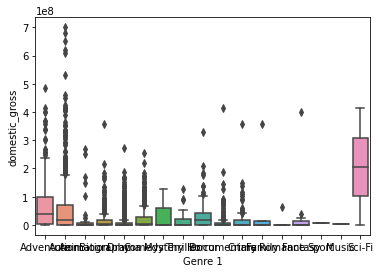

In [191]:
## Let's graph this

sns.boxplot(x='Genre 1', y='domestic_gross', data=joined_df)

In [192]:
## Time to combine total revenue
joined_df['gross_total'] = joined_df['domestic_gross'] + joined_df['foreign_gross']

In [195]:
joined_df.corr()

,domestic_gross,foreign_gross,year,averagerating,numvotes,start_year,runtime_minutes,Adventure,Action,Animation,...,Horror,Documentary,Crime,Family,Romance,Fantasy,Sport,Music,Sci-Fi,gross_total
domestic_gross,1.000000,0.827783,0.009248,0.119377,0.665179,0.037081,0.127532,0.401188,0.225222,0.199909,...,-0.012225,-0.074887,-0.033853,0.050666,-0.100068,0.084795,0.018726,-0.032055,0.262452,0.926645
foreign_gross,0.827783,1.000000,0.130427,0.152904,0.560130,0.121540,0.195690,0.481695,0.287781,0.246443,...,-0.057765,-0.067429,-0.106248,0.027060,-0.126158,0.126603,-0.012325,-0.039777,0.244999,0.977980
year,0.009248,0.130427,1.000000,0.040425,-0.122952,0.811323,0.033309,0.038157,0.004357,0.038841,...,0.014236,-0.019337,-0.016023,-0.056663,-0.068737,0.003001,0.002755,0.004587,0.000630,0.123148
averagerating,0.119377,0.152904,0.040425,1.000000,0.278443,-0.004315,0.151515,0.008078,-0.094519,0.054945,...,-0.224779,0.235007,0.007913,-0.046386,-0.052095,-0.052191,0.054083,0.045388,-0.001589,0.162547
numvotes,0.665179,0.560130,-0.122952,0.278443,1.000000,-0.078421,0.259826,0.313859,0.249819,0.043512,...,-0.013059,-0.127876,0.039322,-0.020112,-0.076822,0.084362,-0.009545,-0.033509,0.319182,0.606019
start_year,0.037081,0.121540,0.811323,-0.004315,-0.078421,1.000000,0.077931,0.060861,0.035803,0.032433,...,0.024710,-0.026537,-0.016840,-0.051376,-0.063915,0.007373,0.016809,0.006590,0.011771,0.113054
runtime_minutes,0.127532,0.195690,0.033309,0.151515,0.259826,0.077931,1.000000,0.066185,0.215116,-0.128417,...,-0.144675,-0.255332,0.077469,-0.056115,0.045952,0.035964,0.049085,0.022405,0.069788,0.184717
Adventure,0.401188,0.481695,0.038157,0.008078,0.313859,0.060861,0.066185,1.000000,0.300337,0.369136,...,-0.086444,-0.096196,-0.094762,0.087590,-0.166228,0.111226,-0.040812,-0.073961,0.151731,0.471750
Action,0.225222,0.287781,0.004357,-0.094519,0.249819,0.035803,0.215116,0.300337,1.000000,-0.009285,...,-0.051762,-0.145652,0.187754,-0.062880,-0.183221,0.051277,-0.032821,-0.091240,0.211489,0.276946
Animation,0.199909,0.246443,0.038841,0.054945,0.043512,0.032433,-0.128417,0.369136,-0.009285,1.000000,...,-0.067642,-0.065631,-0.069379,0.087205,-0.094401,-0.016798,-0.030769,-0.035929,-0.035141,0.243243


In [205]:
movie_info_df = pd.read_csv("Data/tmdb.movies.csv.gz")

In [206]:
movie_info_df.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
